# 阈值分割

阈值分割/二值化

## 目标
* 使用固定阈值、自适应阈值和Otsu阈值二值化图像
* 函数：```cv2.threshold()```,```cv2.adaptiveThreshold()```

## 正文
### 固定阈值分割
* 大于某一阈值则分为一类值，小于某一阈值，则分为另一类值
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547085004410_qJga7BCbPq.jpg)

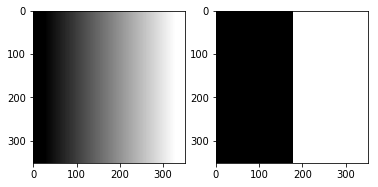

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
#读取灰度图
img=cv2.imread('gradient.jpg',0)

#阈值分割
ret,th=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#显示
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(th,cmap='gray')
plt.show()

* 函数cv2.threshold()
```
返回值：ret:代表当前的阈值
参数1：要处理的原图
参数2：设定的阈值
参数3：最大阈值，一般为255
参数4：阈值的方式，共5中，参考https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576
```

如下5种阈值方式：

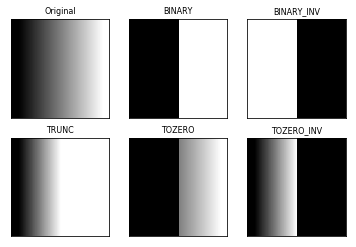

In [9]:
ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,th2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,th3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,th4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,th5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

# 使用Matplotlib显示
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])  # 隐藏坐标轴
plt.show()

图像阈值分割并不等于二值化，阈值分割的结果是两类值，而不是两个值。

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547085272144_psSeOQPg0w.jpg)

### 自适应阈值分割
* cv2.adaptiveThreshold()自适应阈值会每次取图片的一小部分计算阈值，这样图片不同区域的阈值就不尽相同。它有5个参数，其实很好理解，先看下效果：

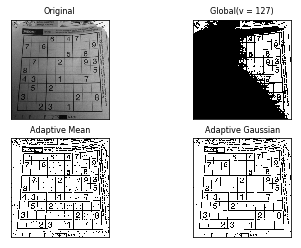

In [17]:
# 自适应阈值对比固定阈值
img = cv2.imread('sudoku.jpg', 0)

# 固定阈值
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 自适应阈值
th2 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
th3 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 6)

titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'Adaptive Gaussian']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

```
参数1：要处理的原图
参数2：最大阈值，一般为255
参数3：小区域阈值的计算方式
        1. ADAPTIVE_THRESH_MEAN_C：小区域内取均值
        2. ADAPTIVE_THRESH_GAUSSIAN_C：小区域内加权求和，权重为高斯核
参数4：阈值方式，和固定阈值一样
参数5：小区域的面积，如11就是11*11的小块
参数6：最终阈值等于小区域计算出的阈值在减去此值
```

### Otsu阈值
固定阈值中，我们是随便选了一个阈值如127，那如何知道我们选的这个阈值效果好不好呢？答案是：不断尝试，所以这种方法在很多文献中都被称为经验阈值。Otsu阈值法就提供了一种自动高效的二值化方法。

## 练习
* Otsu阈值是一种高效的二值化算法，请阅读番外篇：Otsu阈值法

### Otsu阈值法
Otsu阈值法会自动计算阈值。非常适合双峰图片。

#### 双峰图片
是指图片的灰度直方图上有两个峰值。如下图所示：

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547433963624_9s3f81mVti.jpg)

Otsu算法假设这个图片由前景色和背景色组成，通过统计学方法选取一个阈值，将前景和背景分开。如下代码：

对于含噪声的图片要先滤波。

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img=cv2.imread('noisy.jpg',0)

#固定阈值
ret1,th1=cv2.threshold(img,100,225,cv2.THRESH_BINARY)

#Otsu阈值
ret2,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#先进行高斯滤波，在Otsu阈值分割
blur=cv2.GaussianBlur(img,(5,5),0)
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

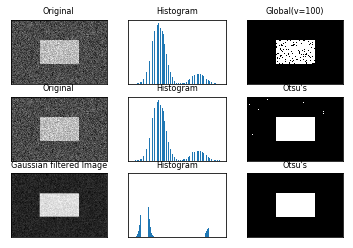

In [5]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original', 'Histogram', 'Global(v=100)',
          'Original', 'Histogram', "Otsu's",
          'Gaussian filtered Image', 'Histogram', "Otsu's"]

for i in range(3):
    # 绘制原图
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3], fontsize=8)
    plt.xticks([]), plt.yticks([])
    
    
    # 绘制直方图plt.hist，ravel函数将数组降成一维
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1], fontsize=8)
    plt.xticks([]), plt.yticks([])
    
    
    # 绘制阈值图
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

* np.ravel()将二维数组展开成一维

In [6]:
import numpy as np

x=np.array([[1,2,3],[4,5,6]])
print(x.ravel())
print(x)
print(x.reshape(-1))

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


### Otsu算法详解

Otsu阈值法将整幅图分为前景（目标）和背景，如下符号约定：

* T：分割阈值
* N0：前景像素点数
* N1：背景像素点数
* w0：前景的像素点数占整幅图的比例
* w1：背景像素点数占整幅图的比例
* $\mu0$：前景的平均像素值
* $\mu1$：背景的平均像素值
* $\mu$：整幅图的平均像素值
* rowsxcols：图像的行数和列数

如下一张1x1的图片，假设阈值为1，则：
![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547434365501_vgncxAvjcJ.jpg)

$$N0+N1=rows \times cols$$

$$w_0=\frac{N0}{rows \times cols}$$

$$w_1=\frac{N1}{rows \times cols}$$

$$\mu=w0\times \mu0+w1\times \mu1$$

定义一个前景$\mu0$和背景$\mu1$的方差g:

$$g=w0(\mu0-\mu)^2+w1(\mu1-\mu)^2$$

结合上式：

$$g=w0w1(\mu0-\mu1)^2$$

g为前景和背景两类之间的方差，这个值越大，则说明前景和背景的差别越大，效果越好。Otsu算法就是遍历T，使g最大，所以又称**最大类间方差法**。基本上双峰图片的阈值T在两峰之间的谷底。